In [5]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras 
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout


In [21]:
Sequential = keras.models.Sequential
Dense = keras.layers.Dense
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout

In [33]:
df = web.DataReader("BBDC4.SA", data_source="yahoo", start="2015-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,16.833435,16.188368,16.482443,16.269001,16646325.0,12.191124
2015-01-05,16.491928,15.799429,15.989155,16.292715,16428748.0,12.215598
2015-01-06,16.828691,16.193110,16.321175,16.828691,21831909.0,12.617448
2015-01-07,17.691944,16.895096,17.046877,17.497477,23002650.0,13.118873
2015-01-08,17.744120,17.217630,17.549650,17.587597,12495706.0,13.186441
...,...,...,...,...,...,...
2019-12-20,32.663635,32.236362,32.572727,32.445454,24617120.0,30.729557
2019-12-23,32.654545,32.254543,32.445454,32.645454,11294690.0,30.918976
2019-12-26,33.172726,32.563637,32.663635,33.054546,11498850.0,31.306429


In [34]:
df.shape

(1241, 6)

In [35]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2015-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [36]:
df_bovespa.shape

(1235, 6)

In [37]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df.describe()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,22.158142,21.585978,21.885802,21.888026,1.827563e+07,18.450914,71258.726316,69996.229960,70605.106883,70656.285020,3.794215e+06,70656.285020
std,6.636685,6.516990,6.588668,6.586653,8.797424e+06,6.487741,19634.810008,19447.130086,19532.433000,19564.626768,1.203582e+06,19564.626768
min,9.858160,9.636181,9.687407,9.681715,0.000000e+00,7.672866,38031.000000,37046.000000,37501.000000,37497.000000,0.000000e+00,37497.000000
25%,17.130830,16.574933,16.846336,16.821578,1.252091e+07,12.966629,53498.500000,52677.000000,53087.500000,53094.500000,3.078600e+06,53094.500000
50%,20.711245,20.247932,20.510895,20.488979,1.676645e+07,17.126554,66758.000000,65842.000000,66195.000000,66235.000000,3.658900e+06,66235.000000
75%,27.056474,26.388085,26.825068,26.773416,2.210809e+07,23.022106,86157.000000,84582.500000,85515.000000,85539.000000,4.389100e+06,85539.000000
max,36.309090,35.472729,36.000000,35.827271,8.762744e+07,31.904379,117803.000000,115995.000000,117205.000000,117203.000000,1.104670e+07,117203.000000


In [38]:
data = df.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa"])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .7)
training_data_len
dataset.shape

(1235, 4)

In [39]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [40]:
scaled_data

array([[0.25194668, 0.18996704, 0.13819537, 0.26090145],
       [0.25285369, 0.18748406, 0.12571199, 0.34997782],
       [0.2733534 , 0.24914467, 0.13178431, 0.41272959],
       ...,
       [0.89395046, 0.13122431, 1.        , 0.34298931],
       [0.88908257, 0.13060293, 0.99160665, 0.35358071],
       [0.887344  , 0.09358998, 0.98445537, 0.33203581]])

In [41]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
    # if i <= (window + 1):
    #   print(X_train)
    #   print(y_train)
    #   print()
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train.shape

(805, 60, 4)

In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [44]:
X_train.shape

(805, 60, 4)

In [45]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 100)           42000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 80)            57920     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [46]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
13/13 [==============================] - 2s 181ms/step - loss: 0.0309
Epoch 2/50
13/13 [==============================] - 2s 184ms/step - loss: 0.0059
Epoch 3/50
13/13 [==============================] - 2s 175ms/step - loss: 0.0038
Epoch 4/50
13/13 [==============================] - 2s 191ms/step - loss: 0.0033
Epoch 5/50
13/13 [==============================] - 3s 213ms/step - loss: 0.0030
Epoch 6/50
13/13 [==============================] - 3s 209ms/step - loss: 0.0030
Epoch 7/50
13/13 [==============================] - 3s 204ms/step - loss: 0.0029
Epoch 8/50
13/13 [==============================] - 2s 178ms/step - loss: 0.0026
Epoch 9/50
13/13 [==============================] - 2s 188ms/step - loss: 0.0025
Epoch 10/50
13/13 [==============================] - 2s 184ms/step - loss: 0.0025
Epoch 11/50
13/13 [==============================] - 2s 177ms/step - loss: 0.0023
Epoch 12/50
13/13 [==============================] - 2s 178ms/step - loss: 0.0020
Epoch 13/50
13/13 [======

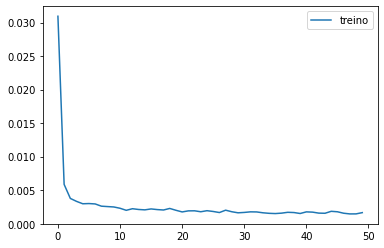

In [47]:
plt.plot(history.history['loss'], label='treino')
plt.legend();

In [48]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(370, 60, 4) (805, 60, 4)


In [49]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
# print(dataset[:,1:])
print(predicted.shape)
predicted = sc.inverse_transform(predicted)
print(predicted)

(370, 4)
[[1.93123579e+01 1.72070357e+15 5.79968518e+09 4.28545680e+13]
 [1.94226480e+01 1.14063901e+15 5.80582254e+09 3.04215071e+13]
 [1.95614372e+01 1.51833045e+15 5.87181911e+09 3.59437525e+13]
 ...
 [2.99779693e+01 1.00761478e+15 9.34181982e+09 4.18548416e+13]
 [3.02188273e+01 1.00284346e+15 9.28849650e+09 4.31473055e+13]
 [3.05033157e+01 7.18637009e+14 9.24306408e+09 4.05181909e+13]]


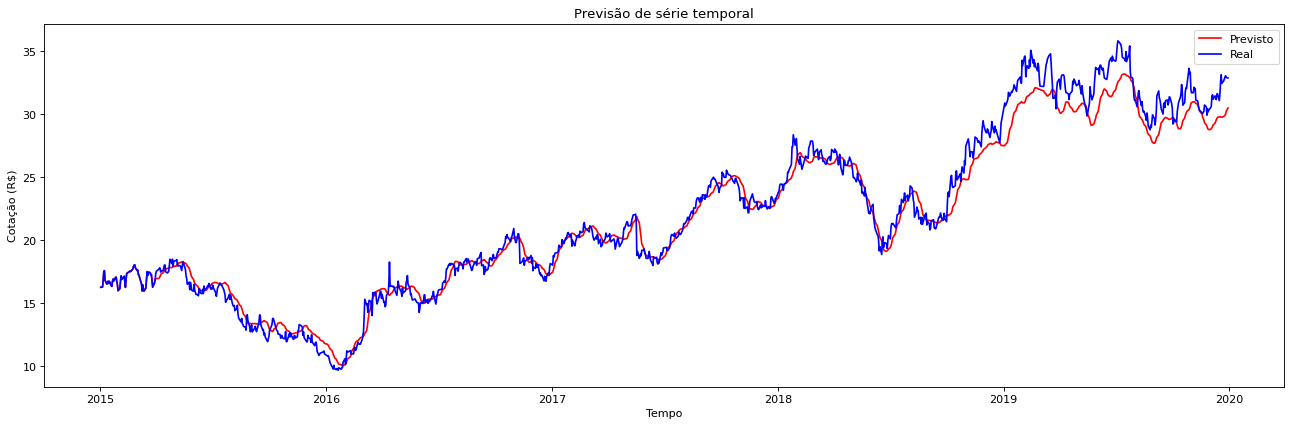

In [50]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [51]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  1.7756695656523789


In [52]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  3.1530024063841076


In [53]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  4.9000154731239824 %


In [54]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  0.7574199595077691


In [55]:
scaled_data = scaled_data
window = 60
X_data = []
y_data = []
for i in range(window, len(scaled_data)):
    X_data.append(scaled_data[i-window:i,:])
    y_data.append(scaled_data[i, 0:1])
X_data, y_data = np.array(X_data), np.array(y_data)
history = regressor.fit(X_data, y_data, epochs = 50, batch_size = 64)

Epoch 1/50
19/19 [==============================] - 6s 313ms/step - loss: 0.0036
Epoch 2/50
19/19 [==============================] - 6s 311ms/step - loss: 0.0028
Epoch 3/50
19/19 [==============================] - 6s 314ms/step - loss: 0.0028
Epoch 4/50
19/19 [==============================] - 6s 311ms/step - loss: 0.0030
Epoch 5/50
19/19 [==============================] - 6s 309ms/step - loss: 0.0025
Epoch 6/50
19/19 [==============================] - 4s 230ms/step - loss: 0.0027
Epoch 7/50
19/19 [==============================] - 5s 265ms/step - loss: 0.0024
Epoch 8/50
 4/19 [=====>........................] - ETA: 2s - loss: 0.0030

KeyboardInterrupt: 

In [ ]:
predicted = regressor.predict(X_data)
print(predicted)
volume = dataset[:len(X_data), 1:]
predicted = np.column_stack((predicted, volume))
predicted = sc.inverse_transform(predicted)
allForecastedData = predicted[:,0:1]
# date = df['DATA']
date = df.index
print(dataset.shape)
print(predicted.shape)
figure(figsize=(20, 6), dpi=80)
plt.plot(dataset[window:, 0:1], color = 'red', label = 'Previsto')
plt.plot(predicted[:,0:1], color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [ ]:
from datetime import date, datetime, timedelta
today = datetime.today()
today_minus_100 = today - timedelta(days=100)
df_new = web.DataReader("PETR4.SA", data_source="yahoo", start=today_minus_100, end=today)
df_bovespa_new = web.DataReader("^BVSP", data_source="yahoo", start=today_minus_100, end=today)
df_dolar_new = web.DataReader("USDBRL=X", data_source="yahoo", start=today_minus_100, end=today)
df_new = df_new.merge(df_bovespa_new, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df_new = df_new.merge(df_dolar_new, left_on='Date', right_on='Date', suffixes=('', '_dolar'))
df_new = df_new.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa"])

print(df_new.tail())
last_days = df_new.values
scaled = sc.transform(last_days)
x = []
x.append(scaled)
x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], -1))
pred_price = regressor.predict(x)
volume_new = last_days[0:1, 1:]
pred_price = np.column_stack((pred_price, volume_new))
pred_price = sc.inverse_transform(pred_price)
print(pred_price[0][0])